In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
dataDir="data/training_setA/"
patientFileNameArr=os.listdir(dataDir)
patientArr=[]
for fileName in patientFileNameArr:
    if fileName[0]=='p':
        patientDf=pd.read_csv(dataDir+fileName, sep='|')
        patientArr.append(patientDf)
septicPatientArr=[]
for patientDf in patientArr:
    if sum(patientDf['SepsisLabel'])>0:
        septicPatientArr.append(patientDf)

In [2]:
splitpoint=round(len(patientArr)*0.7)
np.random.shuffle(patientArr)
train_patients=patientArr[0:splitpoint]
test_patients=patientArr[splitpoint::]


In [3]:
train_records=[]
test_records=[]
for patient in train_patients:
    for index, row in patient.iterrows():
        record=row.to_numpy()
        train_records.append(record)
for patient in test_patients:
    for index, row in patient.iterrows():
        record=row.to_numpy()
        test_records.append(record)
np.random.shuffle(train_records)
np.random.shuffle(test_records)
train_records=np.asarray(train_records)
test_records=np.asarray(test_records)
column_names=patient.columns

In [4]:
column_names

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [5]:
for i in range(len(column_names)):
    a=np.isnan(train_records[:,i])
    a = [ int(x) for x in a ]
    print(sum(a)/len(a))

0.07713201409596096
0.12028734074274872
0.6619210264751062
0.15173217674166442
0.10179271708683474
0.48163549290684016
0.09746272702629438
1.0
0.8960531309297912
0.9196277220565645
0.8585343814945333
0.8855624830577392
0.9124676967561218
0.9505376344086022
0.9851034607391344
0.9185452245414295
0.9854594741122256
0.9502304147465438
0.9170290051504473
0.933573687539532
0.9984223366766062
0.8774717628987079
0.9658859672901419
0.9222607752778531
0.9495653745369116
0.8916110960513237
0.987806993765248
0.9987729285262492
0.8827956989247312
0.9118857865726936
0.9516255534471854
0.9251685190205114
0.9924676967561218
0.934995933857414
0.0
0.0
0.4897731996024216
0.4897731996024216
1.4457395861570434e-05
0.0
0.0


In [6]:
new_train_records=np.delete(train_records, [2,5,7],1)
new_column_names=np.delete(column_names,[2,5,7],0)
new_test_records=np.delete(test_records, [2,5,7],1)
must_have=[0,1,2,3,4,37,36,35,34,33,32,31]

In [7]:
new_column_names[must_have]

Index(['HR', 'O2Sat', 'SBP', 'MAP', 'Resp', 'SepsisLabel', 'ICULOS',
       'HospAdmTime', 'Unit2', 'Unit1', 'Gender', 'Age'],
      dtype='object')

In [8]:
new_column_names

Index(['HR', 'O2Sat', 'SBP', 'MAP', 'Resp', 'BaseExcess', 'HCO3', 'FiO2', 'pH',
       'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

(array([2.30000e+01, 2.60000e+01, 3.50000e+01, 5.90000e+01, 6.80000e+01,
        1.47000e+02, 2.83000e+02, 8.73000e+02, 1.13460e+04, 4.73929e+05]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <a list of 10 Patch objects>)

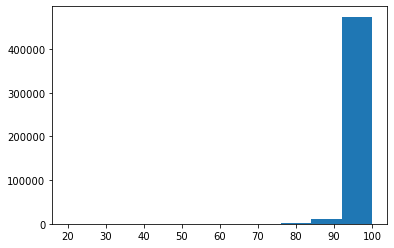

In [9]:
import matplotlib.pyplot as plt
plt.hist(new_train_records[:,1])

In [10]:
# continuousFeature=[0,1,2,3,4,36,35,31]
# continuousFeature=[0,1,2,3,4,31]

In [11]:
new_column_names[must_have]

Index(['HR', 'O2Sat', 'SBP', 'MAP', 'Resp', 'SepsisLabel', 'ICULOS',
       'HospAdmTime', 'Unit2', 'Unit1', 'Gender', 'Age'],
      dtype='object')

In [12]:
# df=pd.DataFrame(data=new_train_records, columns=new_column_names)
# values = {"HR": df["HR"].mean(),"MAP": df["MAP"].mean()}
# df=df.fillna(value=values)
# values = {"Resp": df["Resp"].mean(),"O2Sat": df["O2Sat"].median(), "SBP": df["SBP"].mean()}
# df=df.fillna(value=values)
# values = { "Unit1": 0,"Unit2": 0}
# df=df.fillna(value=values)
# new_train_records=df.to_numpy()

In [13]:
#unit processing
df=pd.DataFrame(data=new_train_records, columns=new_column_names)
values = { "Unit1": 0,"Unit2": 0}
df=df.fillna(value=values)
new_train_records=df.to_numpy()
df=pd.DataFrame(data=new_test_records, columns=new_column_names)
values = { "Unit1": 0,"Unit2": 0}
df=df.fillna(value=values)
new_test_records=df.to_numpy()

In [14]:
temp_records=[]
for record in new_train_records:
    if any(np.isnan(record[must_have])):
        pass
    else:
        temp_records.append(record)
new_train_records=np.asarray(temp_records)
temp_records=[]
for record in new_test_records:
    if any(np.isnan(record[must_have])):
        pass
    else:
        temp_records.append(record)
new_test_records=np.asarray(temp_records)

In [15]:
temp_records=[]
for record in new_train_records:
    pathology=record[5:31]
    pathology=np.isnan(pathology)
    pathology=[not True for i in pathology]
    pathology=[int(i) for i in pathology]
    new_record=record[0:5].tolist()+pathology+record[31::].tolist()
    temp_records.append(new_record)
new_train_records=np.asarray(temp_records)
temp_records=[]
for record in new_test_records:
    pathology=record[5:31]
    pathology=np.isnan(pathology)
    pathology=[not True for i in pathology]
    pathology=[int(i) for i in pathology]
    new_record=record[0:5].tolist()+pathology+record[31::].tolist()
    temp_records.append(new_record)
new_test_records=np.asarray(temp_records)

In [16]:
new_train_data=new_train_records[:,:-1]
new_train_label=new_train_records[:,-1]
new_test_data=new_test_records[:,:-1]
new_test_label=new_test_records[:,-1]

In [17]:
# continuousFeature=[0,1,2,3,4,36,35,31]
continuousFeature=[0,1,2,3,4,31]




new_column_names[continuousFeature]

Index(['HR', 'O2Sat', 'SBP', 'MAP', 'Resp', 'Age'], dtype='object')

In [21]:
continuousFeature=[0,1,2,3,4,36,35,31]
# continuousFeature=[0,1,2,3,4,31]
pathologyFeature=list(range(5,31))
unitAndGender=[32,33,34]
continuousFeatureName=new_column_names[continuousFeature]
pathologyFeatureName=new_column_names[pathologyFeature]
unitAndGenderFeatureName=new_column_names[unitAndGender]

In [22]:
train_continuous_data=new_train_data[:,continuousFeature]
test_continuous_data=new_test_data[:,continuousFeature]
train_pathology_data=new_train_data[:,pathologyFeature]
test_pathology_data=new_test_data[:,pathologyFeature]
train_unitgender_data=new_train_data[:,unitAndGender]
test_unitgender_data=new_test_data[:,unitAndGender]

In [23]:
new_column_names[unitAndGender]

Index(['Gender', 'Unit1', 'Unit2'], dtype='object')

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=4, encode="onehot-dense", subsample=None, strategy="kmeans")
train_continuous_data_binned = enc.fit_transform(train_continuous_data)
test_continuous_data_binned=enc.transform(test_continuous_data)



In [25]:
train_all_data=np.concatenate((train_continuous_data_binned,train_unitgender_data), axis=1)
test_all_data=np.concatenate((test_continuous_data_binned, test_unitgender_data), axis=1)
# train_all_data=np.concatenate((train_continuous_data_binned,train_pathology_data,train_unitgender_data), axis=1)
# test_all_data=np.concatenate((test_continuous_data_binned, test_pathology_data,test_unitgender_data), axis=1)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(max_iter=1000).fit(train_all_data, new_train_label)
predicted_values_1=clf.predict_proba(test_all_data)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(new_test_label, predicted_values_1)
metrics.auc(fpr, tpr)

0.7310748878981054

In [27]:
len(test_all_data)

184946

In [28]:
len(train_all_data)

432487

In [29]:
clf.n_iter_

array([109], dtype=int32)

(array([2.807e+03, 1.690e+02, 3.020e+02, 3.010e+02, 2.260e+02, 1.170e+02,
        4.000e+01, 2.300e+01, 8.000e+00, 2.000e+00]),
 array([0.00372858, 0.04438495, 0.08504132, 0.12569769, 0.16635406,
        0.20701043, 0.2476668 , 0.28832317, 0.32897953, 0.3696359 ,
        0.41029227]),
 <a list of 10 Patch objects>)

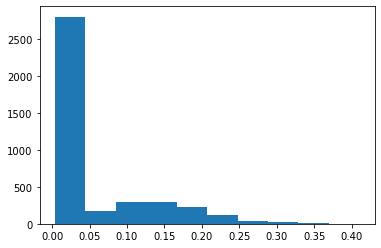

In [30]:
arr=[]
for i in range(len(predicted_values_1)):
    if new_test_label[i]==1:
        arr.append(predicted_values_1[i])
plt.hist(arr)

HR___20.0___74.26___0
-0.31618540493525965
___
HR___109.05___223.0___3
0.3091985039847962
___
O2Sat___73.84___91.83___5
0.2041023532427267
___
MAP___20.0___71.01___12
0.16385154543917335
___
Resp___1.0___17.13___16
-0.3084555404731643
___
Resp___30.26___69.0___19
0.3473509410755373
___
ICULOS___2.0___25.34___20
-1.1848285430460366
___
ICULOS___25.34___69.4___21
-1.0421967495566042
___
ICULOS___69.4___149.2___22
1.08461934835432
___
ICULOS___149.2___336.0___23
1.1367832068076877
___
HospAdmTime___-3322.9___-1980.67___24
-1.0988884278499054
___
HospAdmTime___-1980.67___-609.32___25
0.6569520022345784
___
HospAdmTime___-609.32___-143.92___26
0.374983652287582
___
Gender___32
0.16873697476351057
___
Unit2___34
-0.6364100100787142
___


In [34]:
feature_names_arr=np.array([])
for i in range(len(continuousFeatureName)):
    featureEdges=enc.bin_edges_[i]
    for j in range(len(featureEdges)-1):
        name=continuousFeatureName[i]+"___"+str(round(featureEdges[j],2))+"___"+str(round(featureEdges[j+1],2))
        feature_names_arr=np.append(feature_names_arr,name)
# for name in pathologyFeatureName:
#     feature_names_arr=np.append(feature_names_arr,name)
for name in unitAndGenderFeatureName:
    feature_names_arr=np.append(feature_names_arr,name)

temp_arr=np.array([])
for i in range(len(feature_names_arr)):
    name=feature_names_arr[i]+"___"+str(i)
    temp_arr=np.append(temp_arr,name)
feature_names_arr=temp_arr

In [82]:
len(feature_names_arr)

47

In [41]:
highValueFeature=[]
for i in range(len(clf.coef_[0])):
    if abs(clf.coef_[0][i])>0.15:
        print(feature_names_arr[i])
        print(clf.coef_[0][i])
        print("___")
        highValueFeature.append(i)
#     print(feature_names_arr[i])
#     print(clf.coef_[0][i])
#     print("___")

HR___20.0___74.26___0
-0.31618540493525965
___
HR___109.05___223.0___3
0.3091985039847962
___
O2Sat___73.84___91.83___5
0.2041023532427267
___
MAP___20.0___71.01___12
0.16385154543917335
___
Resp___1.0___17.13___16
-0.3084555404731643
___
Resp___30.26___69.0___19
0.3473509410755373
___
ICULOS___2.0___25.34___20
-1.1848285430460366
___
ICULOS___25.34___69.4___21
-1.0421967495566042
___
ICULOS___69.4___149.2___22
1.08461934835432
___
ICULOS___149.2___336.0___23
1.1367832068076877
___
HospAdmTime___-3322.9___-1980.67___24
-1.0988884278499054
___
HospAdmTime___-1980.67___-609.32___25
0.6569520022345784
___
HospAdmTime___-609.32___-143.92___26
0.374983652287582
___
Gender___32
0.16873697476351057
___
Unit2___34
-0.6364100100787142
___


In [ ]:
unitAndGenderFeatureName

In [43]:
df=pd.DataFrame(data=train_all_data[:,highValueFeature], columns=feature_names_arr[highValueFeature])
df.insert(0,'label',new_train_label)
dontshow=df.to_csv('train_all_data.csv',index=False)

In [44]:
import os
import pprint
import numpy as np
import riskslim

# data
data_name="sepsisData"
data_dir = os.getcwd() + '/data/'                  # directory where datasets are stored
data_csv_file = data_dir + data_name + '_data.csv'          # csv file for the dataset
sample_weights_csv_file = None                              # csv file of sample weights for the dataset (optional)

# problem parameters
max_coefficient = 5                                         # value of largest/smallest coefficient
max_L0_value = 5                                            # maximum model size (set as float(inf))
max_offset = 50                                             # maximum value of offset parameter (optional)
c0_value = 1e-6                                             # L0-penalty parameter such that c0_value > 0; larger values -> sparser models; we set to a small value (1e-6) so that we get a model with max_L0_value terms


# load data from disk
data = riskslim.load_data_from_csv(dataset_csv_file = 'train_all_data.csv', sample_weights_csv_file = sample_weights_csv_file)

# create coefficient set and set the value of the offset parameter
coef_set = riskslim.CoefficientSet(variable_names = data['variable_names'], lb = -max_coefficient, ub = max_coefficient, sign = 0)
coef_set.update_intercept_bounds(X = data['X'], y = data['Y'], max_offset = max_offset)

constraints = {
    'L0_min': 0,
    'L0_max': max_L0_value,
    'coef_set':coef_set,
}

# major settings (see riskslim_ex_02_complete for full set of options)
settings = {
    # Problem Parameters
    'c0_value': c0_value,
    #
    # LCPA Settings
    'max_runtime': 70.0,                               # max runtime for LCPA
    'max_tolerance': np.finfo('float').eps,             # tolerance to stop LCPA (set to 0 to return provably optimal solution)
    'display_cplex_progress': True,                     # print CPLEX progress on screen
    'loss_computation': 'fast',                         # how to compute the loss function ('normal','fast','lookup')
    #
    # LCPA Improvements
    'round_flag': True,                                # round continuous solutions with SeqRd
    'polish_flag': True,                               # polish integer feasible solutions with DCD
    'chained_updates_flag': True,                      # use chained updates
    'add_cuts_at_heuristic_solutions': True,            # add cuts at integer feasible solutions found using polishing/rounding
    #
    # Initialization
    'initialization_flag': True,                       # use initialization procedure
    'init_max_runtime': 120.0,                         # max time to run CPA in initialization procedure
    'init_max_coefficient_gap': 0.49,
    #
    # CPLEX Solver Parameters
    'cplex_randomseed': 0,                              # random seed
    'cplex_mipemphasis': 0,                             # cplex MIP strategy
}

# train model using lattice_cpa
model_info, mip_info, lcpa_info = riskslim.run_lattice_cpa(data, constraints, settings)

#print model contains model
riskslim.print_model(model_info['solution'], data)

#model info contains key results
pprint.pprint(model_info)






setting c0_value = 0.0 for (Intercept) to ensure that intercept is not penalized
08/01/22 @ 05:51 PM | switching loss computation from fast to lookup
08/01/22 @ 05:51 PM | 251 rows in lookup table
08/01/22 @ 05:51 PM | ------------------------------------------------------------
08/01/22 @ 05:51 PM | runnning initialization procedure
08/01/22 @ 05:51 PM | ------------------------------------------------------------
08/01/22 @ 05:52 PM | CPA produced 2 cuts
08/01/22 @ 05:52 PM | running naive rounding on 5 solutions
08/01/22 @ 05:52 PM | best objective value: 0.3705
08/01/22 @ 05:52 PM | rounding produced 5 integer solutions
08/01/22 @ 05:52 PM | best objective value is 0.3300
08/01/22 @ 05:52 PM | running sequential rounding on 5 solutions
08/01/22 @ 05:52 PM | best objective value: 0.3705
08/01/22 @ 05:52 PM | sequential rounding produced 4 integer solutions
08/01/22 @ 05:52 PM | best objective value: 0.2921
08/01/22 @ 05:52 PM | polishing 9 solutions
08/01/22 @ 05:52 PM | best object

Lazy constraint(s) or lazy constraint/branch callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling presolve reductions that prevent crushing forms (CPX_PARAM_PREREFORM).
         Disabling repeat represolve because of lazy constraint/incumbent callback.
Tried aggregator 1 time.
Reduced MIP has 32 rows, 34 columns, and 93 nonzeros.
Reduced MIP has 15 binaries, 17 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.04 ticks)
Probing time = 0.00 sec. (0.01 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.04 ticks)
08/01/22 @ 05:52 PM | adding 270 initial cuts

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variable B NodeID Parent  Depth

      0     0        0.0931    27                      0.0931  

In [ ]:
len(feature_names_arr)

In [49]:
def modelScore(data, c, featureArr, scoreArr):
    score=c
    for i in range(len(featureArr)):
        if data[featureArr[i]]==1:
            score=score+scoreArr[i]
    prob=1/(1+np.exp(-(score)))
    return prob

In [50]:
test_prob=[]
for i in range(len(test_all_data)):
    prob=modelScore(test_all_data[i], -2, [19,25,34,20,21], [1,1,-1,-2,-2])
    test_prob.append(prob)

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(new_test_label, test_prob)
metrics.auc(fpr, tpr)

0.6818111319233706

In [ ]:
arr=[]
for i in range(len(predicted_values_1)):
    if new_test_label[i]==1:
        arr.append(test_prob[i])

In [ ]:
import matplotlib.pyplot as plt
plt.hist(arr)

In [46]:
from sklearn.naive_bayes import BernoulliNB
BerNB=BernoulliNB()
BerNB.fit(train_all_data[:,highValueFeature], new_train_label)
nb_prob=BerNB.predict_proba(test_all_data[:,highValueFeature])[:,1]

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(new_test_label, nb_prob)
metrics.auc(fpr, tpr)

0.7202847645801596

(array([2864.,  195.,  233.,  419.,   52.,  138.,   62.,   15.,   14.,
           3.]),
 array([0.00244375, 0.07195809, 0.14147242, 0.21098675, 0.28050109,
        0.35001542, 0.41952976, 0.48904409, 0.55855842, 0.62807276,
        0.69758709]),
 <a list of 10 Patch objects>)

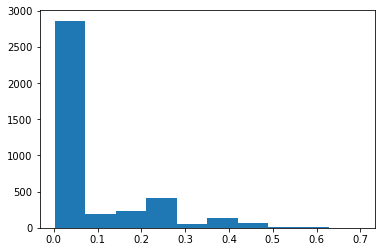

In [48]:
arr=[]
for i in range(len(predicted_values_1)):
    if new_test_label[i]==1:
        arr.append(nb_prob[i])
plt.hist(arr)

In [ ]:
enc = KBinsDiscretizer(n_bins=4, encode="onehot-dense")
sample_binned=enc.fit_transform(sample.reshape(-1,1))

In [ ]:
for i in range(4):
    print(sum(sample_binned[:,i])/len(sample_binned))

In [ ]:
enc.bin_edges_

In [ ]:
# records=[]
# for patient in patientArr:
#     for index, row in patient.iterrows():
#         record=row.to_numpy()
#         records.append(record)
# column_names=patient.columns[:-1]

# records=np.asarray(records)
# np.random.shuffle(records)
# splitpoint=round(len(records)*0.7)
# train_records=records[0:splitpoint]
# test_records=records[splitpoint::]

In [ ]:
column_names

In [ ]:
def continuousFeatureTransform(train_feature_arr, test_feature_arr, bin_number):
    train_feature_binned=[]
    test_feature_binned=[]
    non_nan_data=[]
    for data in train_feature_arr:
        if np.isnan(data)==False:
            non_nan_data.append(data)
    non_nan_data=np.asarray(non_nan_data).reshape(-1, 1)
    enc = KBinsDiscretizer(n_bins=3, encode="onehot-dense")
    data_binned=enc.fit_transform(non_nan_data)
    for i in train_feature_arr:
        if np.isnan(i)==True:
            train_feature_binned.append(np.append(np.array([[1]]), np.zeros(bin_number).reshape(1,-1)))
        else:
            train_feature_binned.append(np.append(np.array([[0]]),enc.transform(np.array([[i]]))))
    for j in test_feature_arr:
        if np.isnan(j)==True:
            test_feature_binned.append(np.append(np.array([[1]]), np.zeros(bin_number).reshape(1,-1)))
        else:
            test_feature_binned.append(np.append(np.array([[0]]),enc.transform(np.array([[j]]))))
    return [np.asarray(train_feature_binned), test_feature_binned, enc]

In [ ]:
continueousFeatureIndexArr=[0,1,2,3,4,5,6,8,34,39]
# continueousFeatureIndexArr=[0,1,2,39]
bin_enc_arr=[]
train_feature_arr=[]
test_feature_arr=[]
for index in continueousFeatureIndexArr:
#     train_data_feature=train_sample[:,index]
#     test_data_feature=test_sample[:,index]
    train_data_feature=train_data[:,index]
    test_data_feature=test_data[:,index]
    result=continuousFeatureTransform(train_data_feature, test_data_feature,3)
    bin_enc_arr.append(result[2])
    train_feature_arr.append(result[0])
    test_feature_arr.append(result[1])
train_feature_arr=np.concatenate(train_feature_arr, axis=1)
test_feature_arr=np.concatenate(test_feature_arr, axis=1)

In [ ]:
train_sample=train_data[:3000]
test_sample=test_data[:3000]

In [ ]:
np.shape(test_feature_arr)

In [ ]:
len(test_label_duh)

In [ ]:
train_label_duh=train_label[:]
test_label_duh=test_label[:-1]

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_feature_arr, train_label_duh)

In [ ]:

# vitalRecord=[]
# sepsisLabel=[]
# for patient in patientArr:
#     for index, row in patient.iterrows():
#         if not np.isnan([row['HR'], row['O2Sat'], row['Resp'], row['Age'], row['ICULOS'], row['Gender'], row['MAP']]).any():
#             vitalRecord.append([row['HR'], row['O2Sat'], row['Resp'], row['Age'], row['ICULOS'], row['Gender'], row['MAP']])
#             sepsisLabel.append(row['SepsisLabel'])

In [ ]:
from sklearn import metrics
predicted_values_1=clf.predict_proba(test_feature_arr)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(test_label_duh, predicted_values_1)
metrics.auc(fpr, tpr)

In [ ]:
a=np.array([[1,1,1],[2,1,0]])
b=np.array([[1,2],[1,3]])
c=np.concatenate((a,b),axis=1)

In [ ]:
len(sepsisLabel)

In [ ]:
d

In [ ]:
sum(sepsisLabel)/len(sepsisLabel)

In [ ]:
sum(sepsisLabel)

In [ ]:
splitpoint=round(len(vitalRecord)*0.7)
train_data=vitalRecord[0:splitpoint]
test_data=vitalRecord[splitpoint::]
train_label=sepsisLabel[0:splitpoint]
test_label=sepsisLabel[splitpoint::]



In [ ]:
#smote
from imblearn.over_sampling import SMOTE
model_smote=SMOTE()
x,y=model_smote.fit_resample(train_data,train_label)
train_data=x
train_label=y

In [ ]:
#under sample
from imblearn.under_sampling import RandomUnderSampler
model_RandomUnderSampler=RandomUnderSampler()
x,y=model_RandomUnderSampler.fit_resample(train_data,train_label)
train_data=x
train_label=y

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_data, train_label)

In [ ]:
#evaluation methods probably useless


clf.score(test_data,test_label)
predicted_values1=clf.predict_proba(test_data)[:,1]
### Converting predicted values into classes using threshold
threshold=0.03

predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(test_label,predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

In [ ]:
from sklearn import metrics
predicted_values1=clf.predict_proba(test_data)[:,1]


fpr, tpr, thresholds = metrics.roc_curve(test_label, predicted_values1)
metrics.auc(fpr, tpr)

In [ ]:
len(train_data)

In [ ]:
len(septicPatientArr)

In [ ]:
feature_names_arr=np.array([])
for i in range(19):
    name='feature_'+str(i+1)
    feature_names_arr=np.append(feature_names_arr,name)


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=3, encode="onehot-dense")
train_data_binned = enc.fit_transform(train_data)
test_data_binned=enc.transform(test_data)


In [ ]:

from sklearn.linear_model import LogisticRegression
clf_binned = LogisticRegression().fit(train_data_binned, train_label)
#evaluation methods probably useless


predicted_values1=clf_binned.predict_proba(test_data_binned)[:,1]
### Converting predicted values into classes using threshold
threshold=0.03

predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(test_label,predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_label, predicted_values1)
metrics.auc(fpr, tpr)

In [ ]:
plt.hist(predicted_values1)

In [ ]:
df=pd.DataFrame(data=train_data_binned, columns=feature_names_arr)
df.insert(0,'label',train_label)
dontshow=df.to_csv('/Users/xionglin/train_data_binned.csv',index=False)

In [ ]:
import os
import pprint
import numpy as np
import riskslim

# data
data_name = "breastcancer"                                  # name of the data
data_dir = os.getcwd() + '/data/'                  # directory where datasets are stored
data_csv_file = data_dir + data_name + '_data.csv'          # csv file for the dataset
sample_weights_csv_file = None                              # csv file of sample weights for the dataset (optional)

# problem parameters
max_coefficient = 5                                         # value of largest/smallest coefficient
max_L0_value = 5                                            # maximum model size (set as float(inf))
max_offset = 50                                             # maximum value of offset parameter (optional)
c0_value = 1e-6                                             # L0-penalty parameter such that c0_value > 0; larger values -> sparser models; we set to a small value (1e-6) so that we get a model with max_L0_value terms


# load data from disk
data = riskslim.load_data_from_csv(dataset_csv_file = '/Users/xionglin/train_data_binned.csv', sample_weights_csv_file = sample_weights_csv_file)

# create coefficient set and set the value of the offset parameter
coef_set = riskslim.CoefficientSet(variable_names = data['variable_names'], lb = -max_coefficient, ub = max_coefficient, sign = 0)
coef_set.update_intercept_bounds(X = data['X'], y = data['Y'], max_offset = max_offset)

constraints = {
    'L0_min': 0,
    'L0_max': max_L0_value,
    'coef_set':coef_set,
}

# major settings (see riskslim_ex_02_complete for full set of options)
settings = {
    # Problem Parameters
    'c0_value': c0_value,
    #
    # LCPA Settings
    'max_runtime': 6000.0,                               # max runtime for LCPA
    'max_tolerance': np.finfo('float').eps,             # tolerance to stop LCPA (set to 0 to return provably optimal solution)
    'display_cplex_progress': True,                     # print CPLEX progress on screen
    'loss_computation': 'fast',                         # how to compute the loss function ('normal','fast','lookup')
    #
    # LCPA Improvements
    'round_flag': True,                                # round continuous solutions with SeqRd
    'polish_flag': True,                               # polish integer feasible solutions with DCD
    'chained_updates_flag': True,                      # use chained updates
    'add_cuts_at_heuristic_solutions': True,            # add cuts at integer feasible solutions found using polishing/rounding
    #
    # Initialization
    'initialization_flag': True,                       # use initialization procedure
    'init_max_runtime': 120.0,                         # max time to run CPA in initialization procedure
    'init_max_coefficient_gap': 0.49,
    #
    # CPLEX Solver Parameters
    'cplex_randomseed': 0,                              # random seed
    'cplex_mipemphasis': 0,                             # cplex MIP strategy
}

# train model using lattice_cpa
model_info, mip_info, lcpa_info = riskslim.run_lattice_cpa(data, constraints, settings)

#print model contains model
riskslim.print_model(model_info['solution'], data)

#model info contains key results
pprint.pprint(model_info)



